### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Now we load the image and clip the object

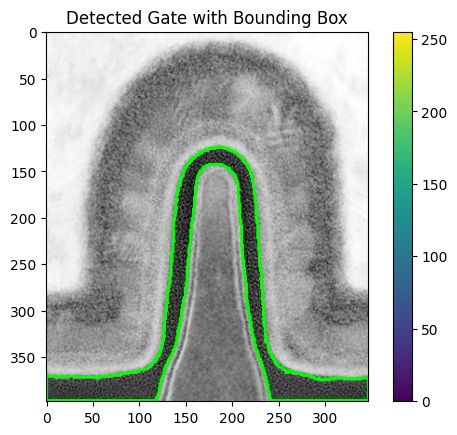

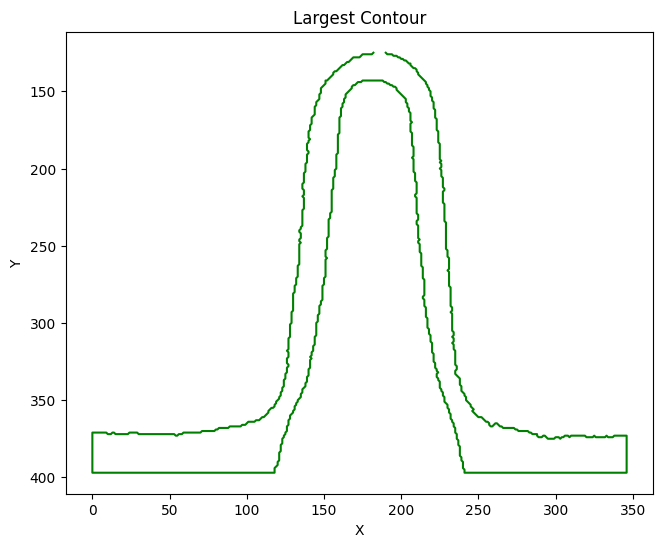

array([[182, 125],
       [181, 126],
       [175, 126],
       [173, 128],
       [169, 128],
       [166, 131],
       [165, 131],
       [163, 133],
       [162, 133],
       [158, 137],
       [157, 137],
       [156, 138],
       [156, 139],
       [152, 143],
       [151, 143],
       [151, 145],
       [148, 148],
       [148, 151],
       [147, 152],
       [147, 155],
       [145, 157],
       [145, 159],
       [144, 160],
       [144, 165],
       [142, 167],
       [142, 171],
       [141, 172],
       [141, 175],
       [140, 176],
       [140, 180],
       [141, 181],
       [140, 182],
       [140, 183],
       [139, 184],
       [139, 188],
       [140, 189],
       [140, 190],
       [139, 191],
       [139, 196],
       [138, 197],
       [138, 202],
       [137, 203],
       [137, 209],
       [136, 210],
       [136, 213],
       [137, 214],
       [137, 217],
       [136, 218],
       [137, 219],
       [137, 226],
       [136, 227],
       [136, 237],
       [135,

In [3]:
# load image into cv2
image_fp = 'finfet.jpg'
image = cv2.imread(image_fp)
image = cv2.bitwise_not(image)
image = image[10:-10, 10:-20]
# Convert to greyscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Invert the image if necessary (if the gate is white on black background)


# Apply thresholding to create a binary image
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
roi = thresh[25:200, 30:150]

# Find contours within the ROI
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour corresponds to the gate
largest_contour = max(contours, key=cv2.contourArea)
largest_contour_array = largest_contour.squeeze()




# Optionally, visualize the contour and bounding box
cv2.drawContours(image, [largest_contour], -1, (0, 255, 0), 2)

# Display the result
plt.imshow(image)
plt.colorbar()
plt.title('Detected Gate with Bounding Box')
#plt.xlim(-50,400)
#plt.ylim(450,-50)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(largest_contour_array[:, 0], largest_contour_array[:, 1], color='green')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Largest Contour')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
largest_contour_array


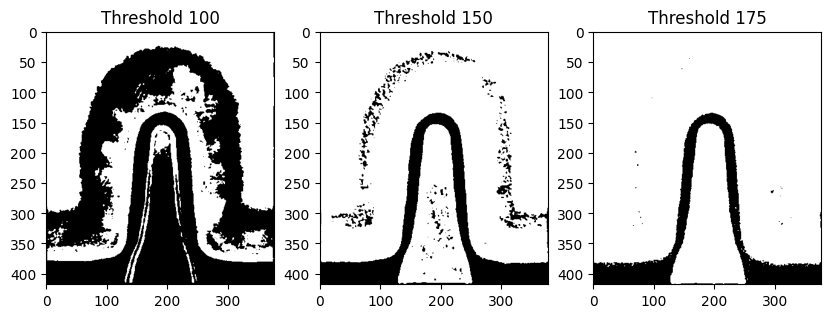

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('finfet.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply different thresholding to create binary images
_, thresh1 = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
_, thresh2 = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(blurred, 175, 255, cv2.THRESH_BINARY_INV)

# Display the images with different thresholds
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Threshold 100')

plt.subplot(1, 3, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Threshold 150')

plt.subplot(1, 3, 3)
plt.imshow(thresh3, cmap='gray')
plt.title('Threshold 175')

plt.show()